In [0]:
from skimage import data, io, filters
from skimage.morphology import disk
from scipy.signal import convolve2d as conv2d
import numpy as np

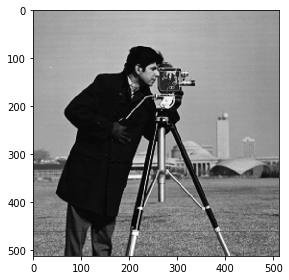

In [5]:
img = data.camera()
io.imshow(img, cmap='gray')

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


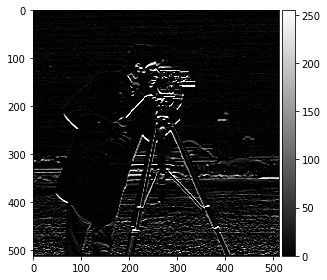

In [6]:
sobel_kernel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])
img_sobel = conv2d(img, sobel_kernel, mode='same')
img_sobel = np.clip(img_sobel, 0, 255)
io.imshow(img_sobel, cmap='gray')

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


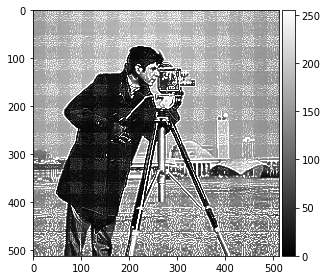

In [7]:
laplacian_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
img_laplacian = conv2d(img, laplacian_kernel, mode='same')
img_laplacian = np.clip(img_laplacian, 0, 255)

alpha = 5
enhanced_img = img + alpha * img_laplacian
enhanced_img = np.clip(enhanced_img, 0, 255)
io.imshow(enhanced_img, cmap='gray')

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


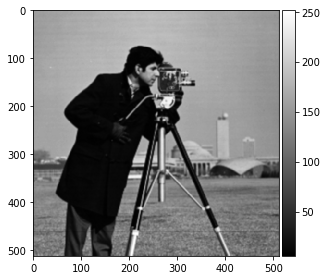

In [10]:
mean_kernel = np.array([
   [1, 4, 6, 4, 1],
   [4, 16, 24, 16, 4],
   [6, 24, 36, 24, 6],
   [4, 16, 24, 16, 4],  
   [1, 4, 6, 4, 1]           
])
blurred = mean_kernel/256
img_mean = conv2d(img, blurred, mode='same')
img_mean = np.clip(img_mean, 0, 255)
io.imshow(img_mean, cmap='gray')